# Aditya Raj Singh Chauhan - GRIPFebruary23
## TASK-4: 'Exploratory Data Analysis- Terrorism'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')

C:\Users\Adity\AppData\Local\Temp\ipykernel_24356\2333097857.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Select Columns which gives more Infirmation 

In [6]:
df.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
df=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','location','summary','attacktype1_txt','targtype1_txt','gname','motive','weaptype1_txt','nkill','success','nwound']]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,success,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,1,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,1,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,1,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,1,NaN


### Rename Columns

In [8]:
df=df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state','city':'city','location':'location','summary':'summary','attacktype1_txt':'attack_type','targtype1_txt':'target_type','gname':'gang_name','motive':'motive','weaptype1_txt':'weapon_type','nkill':'death','success':'success','nwound':'injured'})
df.head()

,year,month,day,country,region,state,city,location,summary,attack_type,target_type,gang_name,motive,weapon_type,death,success,injured
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,1,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,1,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,1,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,1,NaN


### Finding Null values and fill it with 0 or unknown  

In [9]:
df.isnull().sum()

year                0
month               0
day                 0
country             0
region              0
state             421
city              434
location       126196
summary         66129
attack_type         0
target_type         0
gang_name           0
motive         131130
weapon_type         0
death           10313
success             0
injured         16311
dtype: int64

In [10]:
df['location'].fillna('Unknown')
df['summary'].fillna('Unknown')
df['state'].fillna('Unknown')
df['city'].fillna('Unknown')
df['death'].fillna(0)
df['injured'].fillna(0)
df['motive'].fillna('Unknown')

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
181686    Unknown
181687    Unknown
181688    Unknown
181689    Unknown
181690    Unknown
Name: motive, Length: 181691, dtype: object

In [11]:
df.describe()

,year,month,day,death,success,injured
count,181691.000000,181691.000000,181691.000000,171378.000000,181691.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,0.889598,3.167668
std,13.259430,3.388303,8.814045,11.545741,0.313391,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,1.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,1.000000,8191.000000


### Here we can see the total unique elements in each column  

In [12]:
hh=df.nunique(axis=0)
hh

year               47
month              13
day                32
country           205
region             12
state            2855
city            36674
location        44109
summary        112492
attack_type         9
target_type        22
gang_name        3537
motive          14490
weapon_type        12
death             205
success             2
injured           238
dtype: int64

### Analysis

### Plotting Year and month wise total No. of attack in the world

Text(0, 0.5, 'No. of total attack in world')

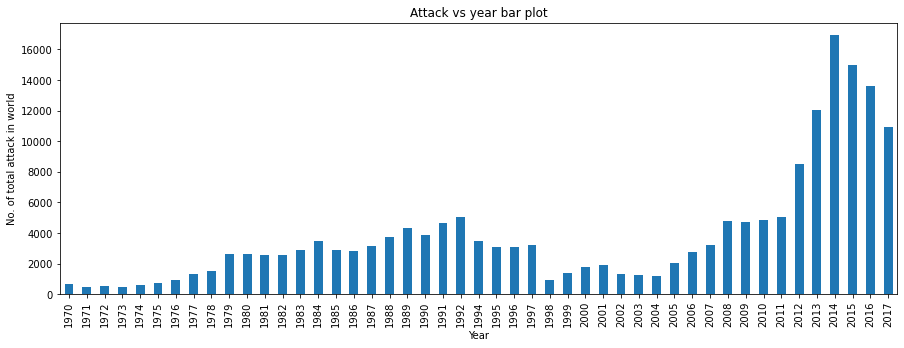

In [13]:
x=df['year'].value_counts()
x=x.sort_index()
x.plot(kind='bar',figsize=[15,5])

plt.title('Attack vs year bar plot')
plt.xlabel('Year')
plt.ylabel('No. of total attack in world')

In [14]:
df['year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: year, dtype: int64

Text(0.5, 1.0, 'Attack vs Month bar plot')

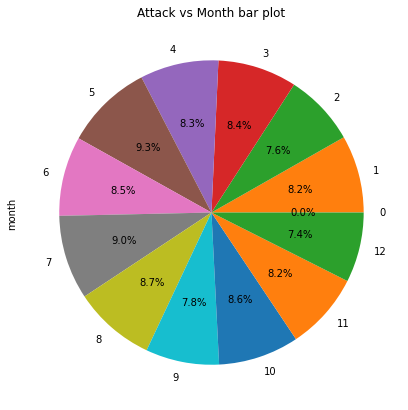

In [15]:
x=df['month'].value_counts()
x=x.sort_index()
x.plot(kind='pie',figsize=[15,7], autopct='%1.1f%%')

plt.title('Attack vs Month bar plot')
# plt.xlabel('Year')
# plt.ylabel('No. of total attack in world')

### Country wise analysis 

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country, dtype: int64


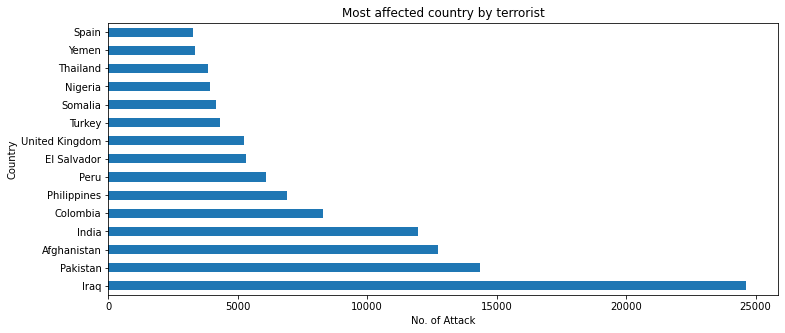

In [16]:
print(df['country'].value_counts().head(15))
df['country'].value_counts().head(15).plot(kind='barh',figsize=[12,5])
plt.title('Most affected country by terrorist')
plt.xlabel('No. of Attack')
plt.ylabel('Country')
plt.show()


Text(0.5, 1.0, 'Injured vs Country')

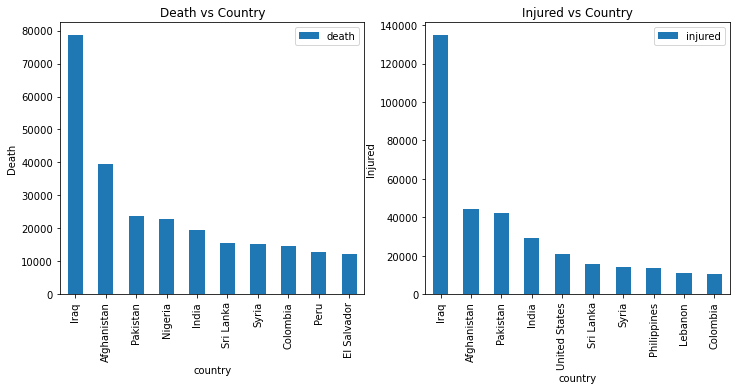

In [17]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
dd=df[['country', 'death']].groupby('country').sum().sort_values('death',ascending=False)
dr=df[['country', 'injured']].groupby('country').sum().sort_values('injured',ascending=False)
dd.head(10).plot(kind='bar',figsize=[12,5], ax=ax0)
dr.head(10).plot(kind='bar',figsize=[12,5],ax=ax1)
ax0.set_ylabel('Death')
ax1.set_ylabel('Injured')
ax0.set_title('Death vs Country')
ax1.set_title('Injured vs Country')

### City wise analysis 

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64


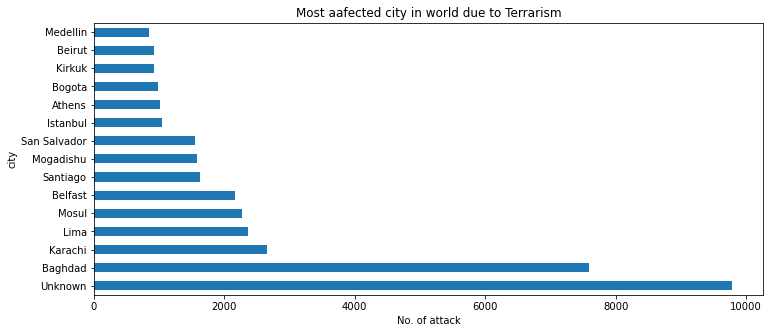

In [18]:
tf=df['city'].value_counts().head(15)
print(tf)
tf.plot(kind='barh',figsize=[12,5])
plt.title('Most aafected city in world due to Terrarism')
plt.xlabel('No. of attack')
plt.ylabel('city')
plt.show()

### Target type and Gang wise Analysis

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: target_type, dtype: int64


Text(0, 0.5, 'No. of targets')

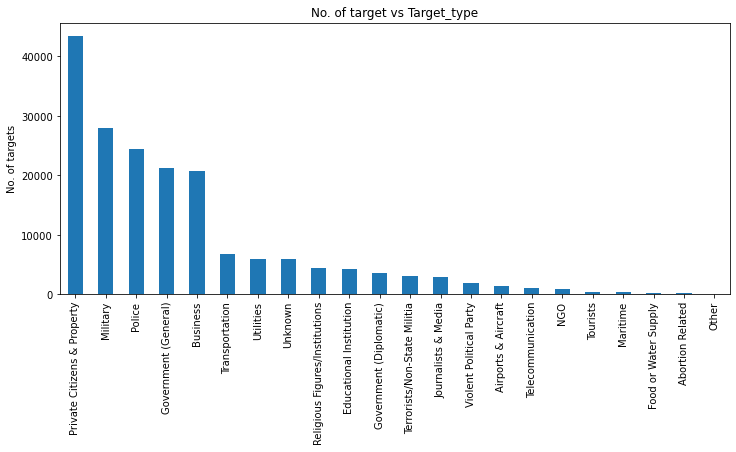

In [19]:
tf=df['target_type'].value_counts()
tf.plot(kind='bar',figsize=[12,5])
print(tf.head(10))
plt.title('No. of target vs Target_type')
plt.ylabel('No. of targets')

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gang_name, dtype: int64


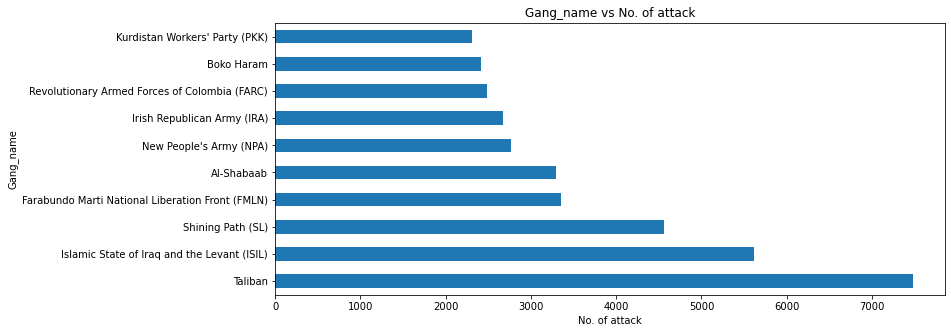

In [20]:
tf= df['gang_name'].value_counts()[1:15].head(10)
tf.plot(kind='barh',figsize=[12,5])
print(tf)
plt.title('Gang_name vs No. of attack')
plt.xlabel('No. of attack')
plt.ylabel('Gang_name')
plt.show()

In [21]:
gk=df[['gang_name', 'death']].groupby('gang_name').sum().sort_values('death',ascending=False)
tt=gk.iloc[1:10]
tt.head(10)

,death
gang_name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


### No. of people killed by Different different Gangs

Text(0, 0.5, 'death')

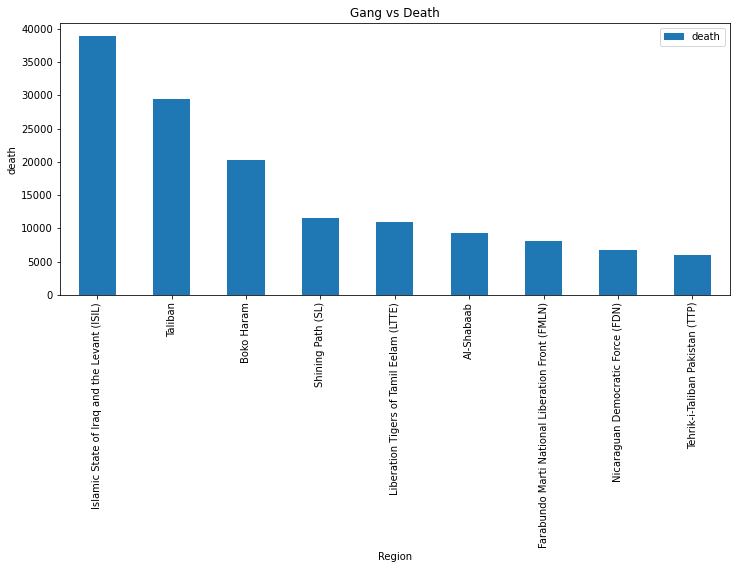

In [22]:
tt.plot(kind='bar',figsize=[12,5])
plt.title('Gang vs Death')
plt.xlabel('Region')
plt.ylabel('death')

### Region wise analysis 

In [23]:
x=df[['region', 'death']].groupby('region').sum().sort_values('death',ascending=False)
x

,death
region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


Text(0, 0.5, 'death')

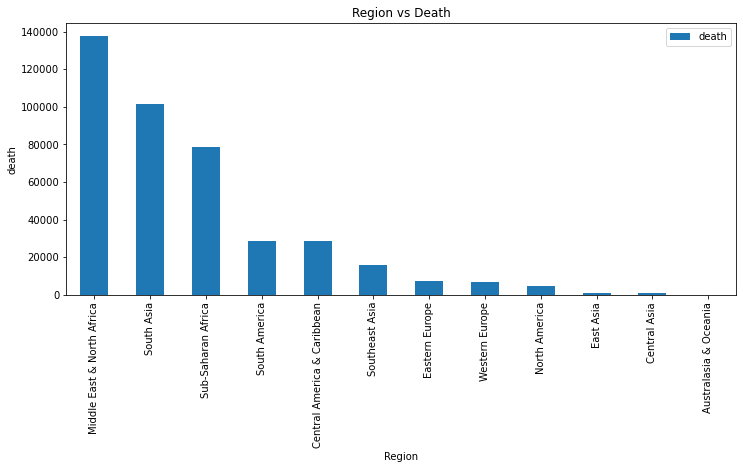

In [24]:
x.plot(kind='bar',figsize=[12,5])
plt.title('Region vs Death')
plt.xlabel('Region')
plt.ylabel('death')


Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: region, dtype: int64


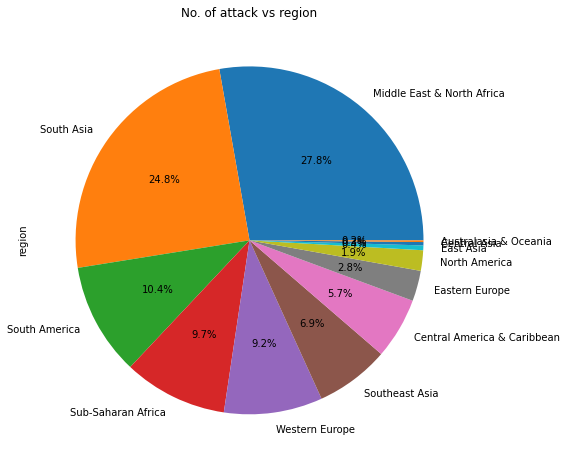

In [25]:
df['region'].value_counts().plot(kind='pie', figsize=[15,8], autopct='%1.1f%%')
print(df['region'].value_counts().head(10))
plt.title('No. of attack vs region')
plt.show()

### Distribution plot of different different type of attack 

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64


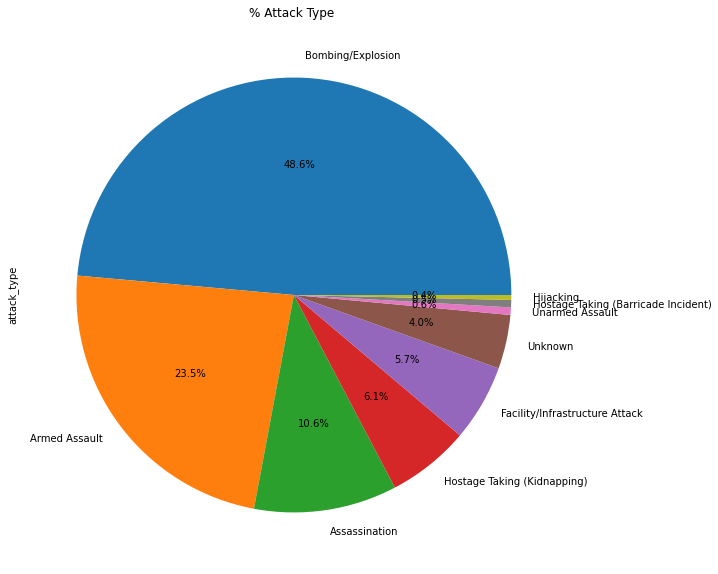

In [26]:
df['attack_type'].value_counts().plot(kind='pie',figsize=[20,10], autopct='%1.1f%%')
plt.title('% Attack Type ')
print(df['attack_type'].value_counts().head(10))

### Analysis on Weapon used  

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weapon_type, dtype: int64


Text(0.5, 1.0, 'No. of times vs Weapon used')

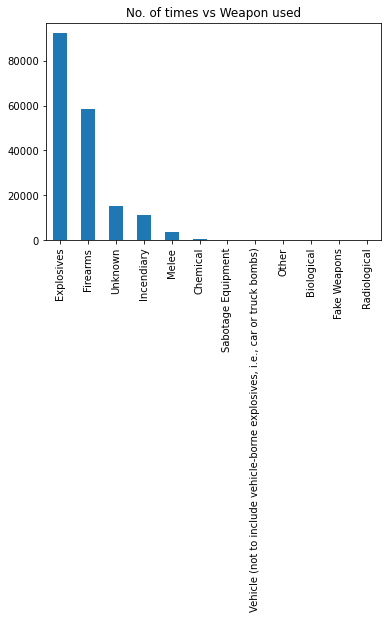

In [27]:
df['weapon_type'].value_counts().plot(kind='bar')
print(df['weapon_type'].value_counts().head(10))
plt.title('No. of times vs Weapon used')

weapon_type
Biological           9.0
Chemical           624.0
Explosives      174277.0
Fake Weapons         1.0
Firearms        174894.0
Name: death, dtype: float64


Text(0.5, 1.0, 'percentage death due to different type of weaphone')

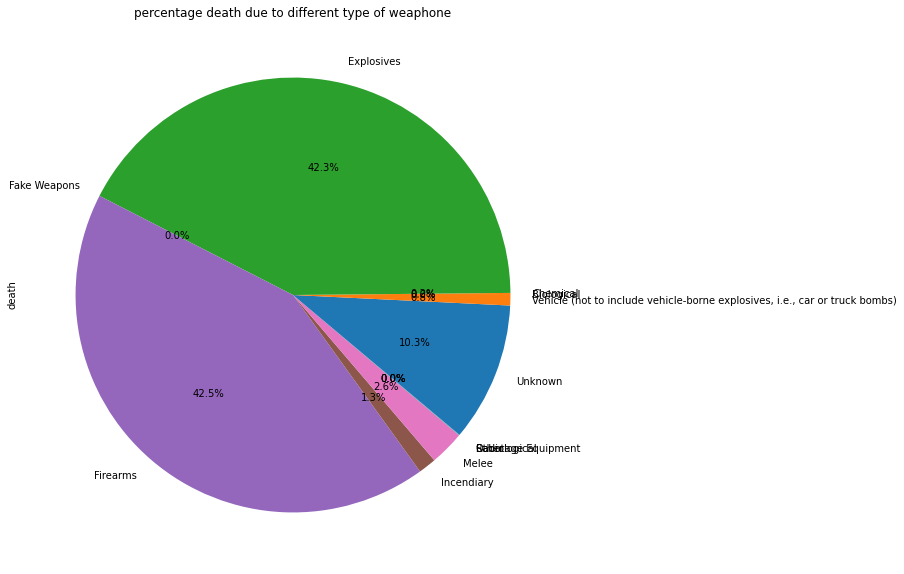

In [28]:
trp=df.groupby('weapon_type').death.sum()
print(trp.head())
trp.plot(kind='pie', figsize=[20,10], autopct='%1.1f%%')
plt.title('percentage death due to different type of weaphone')

### here we can see the success rate of Terrorism in the world 

<AxesSubplot:ylabel='success'>

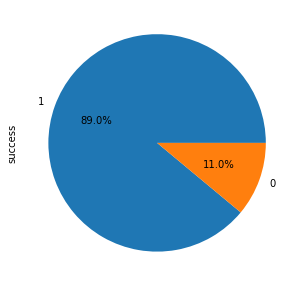

In [29]:
df['success'].value_counts().plot(kind='pie',figsize=[12,5], autopct='%1.1f%%')

## Terrorism analysis In India and in Indian states 

In [30]:
tf=df[df['country']=='India']
print(f'Total attack on India {tf.shape[0]}')
x=tf['death'].sum()
print(f'Death due to terrarist attack in India- {x}')

Total attack on India 11960
Death due to terrarist attack in India- 19341.0


                    death  injured
state                             
Jammu and Kashmir  4079.0   8569.0
Punjab             2751.0   2274.0
Assam              2112.0   3953.0
Chhattisgarh       1465.0   1053.0
Maharashtra        1010.0   2036.0
Jharkhand           796.0    723.0
Bihar               765.0    561.0
Manipur             747.0   1087.0
Unknown             673.0    384.0
West Bengal         671.0    986.0
Andhra Pradesh      543.0    676.0
Uttar Pradesh       502.0    858.0
Delhi               439.0   2041.0
Tripura             358.0    245.0
Orissa              276.0    268.0
Haryana             268.0    373.0
Tamil Nadu          248.0    738.0
Odisha              221.0    151.0
Chandigarh          192.0    141.0
Madhya Pradesh      191.0    130.0
Nagaland            190.0    224.0
Gujarat             159.0    454.0
Meghalaya           134.0    186.0
Himachal Pradesh    126.0    265.0
Rajasthan           119.0    109.0
Uttaranchal         117.0    219.0
Karnataka           

C:\Users\Adity\AppData\Local\Temp\ipykernel_24356\2463959400.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jk=tf.groupby('state')['death','injured'].sum()


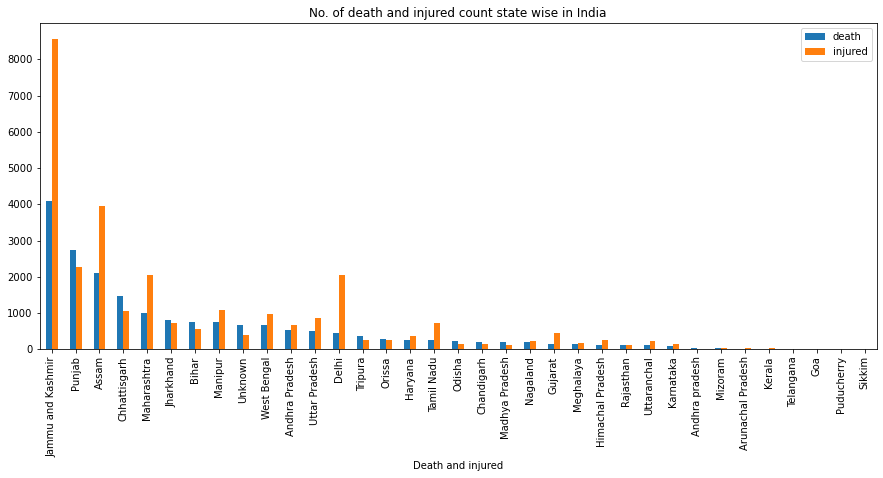

In [31]:
jk=tf.groupby('state')['death','injured'].sum()
jk=jk.sort_values('death',ascending=False)
print(jk)
jk.plot(kind='bar',figsize=[15,6])
plt.title('No. of death and injured count state wise in India')
plt.xlabel('Death and injured')
plt.show()

### Number of attack state wise in India 

Text(0, 0.5, 'Indian states')

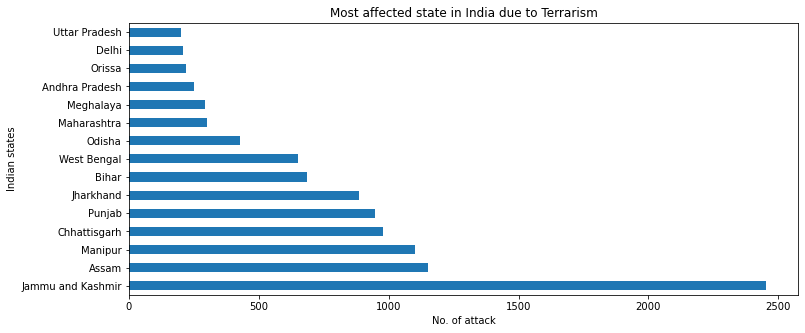

In [32]:
tf['state'].value_counts().head(15).plot(kind='barh',figsize=[12,5])
plt.title('Most affected state in India due to Terrarism')
plt.xlabel('No. of attack')
plt.ylabel('Indian states')

### Death and Injured plot with Year wise in each state 

Text(0.5, 1.0, 'Death, Year, State wise analysis')

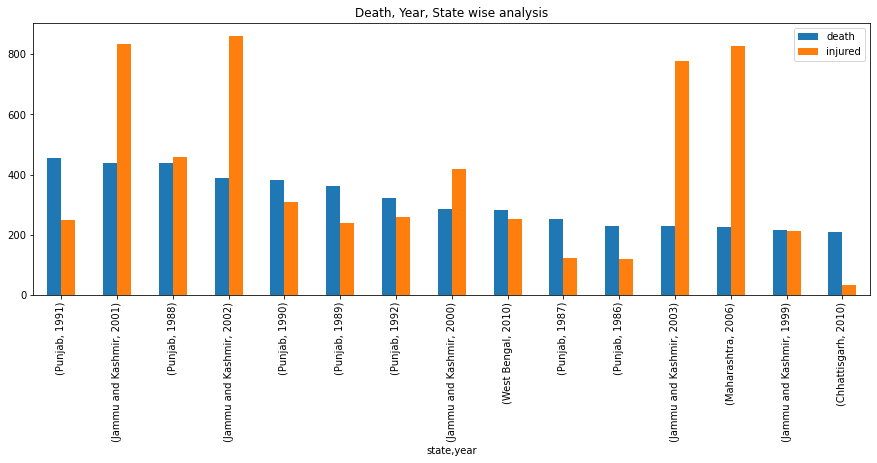

In [33]:
trr=tf[['year','state','death','injured']].groupby(['state','year']).sum().sort_values('death',ascending=False).head(15)
trr.plot(kind='bar', figsize=[15,5])
plt.title('Death, Year, State wise analysis')

In [34]:
tg=tf[['year','state']].groupby(['state'])['year'].value_counts().head(1)
tg

state           year
Andhra Pradesh  2014    25
Name: year, dtype: int64

In [35]:
tt=df[df['country']=='India']

tt.shape

(11960, 17)

In [36]:
tt['success'].sum()

10280

In [37]:
# No. of attack in India= 11960 and successful attack is 10280

# Result
### 1.There are 12 different types of weaphons used and 9 different types of attack

### 2.In india Maximum death is in Jammu and Kashmir

### 3.Maximum time used weapon is Explosion

### 4.Maximum terrorists attack among all known city is Baghdad then Karachi

### 5.Taliban is most involved terrerist gang in the world

### 6.Highest no. of attack till now - Iraq then pakistan then afganistan then India

### 7.Explosion and firearms are mostly used in attack

### 8.Middle east and north africa are mostly affected region